# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"] ["lat"]
        city_lng = city_weather["coord"] ["lon"]
        city_max_temp = city_weather["main"] ["temp"]
        city_humidity = city_weather["main"] ["humidity"]
        city_clouds = city_weather["clouds"] ["all"]
        city_wind = city_weather["wind"] ["speed"]
        city_country = city_weather["sys"] ["country"]
        city_date =city_weather["dt"] 

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | luderitz
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | konde
Processing Record 4 of Set 1 | kandyagash
Processing Record 5 of Set 1 | fonte boa
Processing Record 6 of Set 1 | berezovyy
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | luanda
Processing Record 10 of Set 1 | uturoa
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | broome
Processing Record 13 of Set 1 | wotho
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | whitehorse
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | svetlyy
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | bilibino
Processing Record 23 of Set 1

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,15.13,67,0,2.93,NA,1715060690
1,port-aux-francais,-49.3500,70.2167,7.37,91,98,13.59,TF,1715060691
2,konde,-4.9500,39.7500,27.11,86,92,4.17,TZ,1715060692
3,kandyagash,49.4744,57.4233,15.47,42,2,2.47,KZ,1715060692
4,fonte boa,-2.4959,-66.2662,23.36,100,100,1.54,BR,1715060693


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,15.13,67,0,2.93,NaN,1715060690
1,port-aux-francais,-49.3500,70.2167,7.37,91,98,13.59,TF,1715060691
2,konde,-4.9500,39.7500,27.11,86,92,4.17,TZ,1715060692
3,kandyagash,49.4744,57.4233,15.47,42,2,2.47,KZ,1715060692
4,fonte boa,-2.4959,-66.2662,23.36,100,100,1.54,BR,1715060693


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

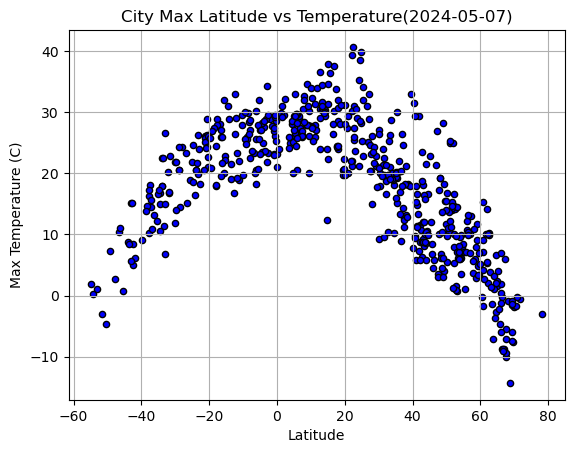

In [11]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
# YOUR CODE HERE
city_data_df.plot(kind="scatter", x="Lat",y="Max Temp",title="City Max Latitude vs Temperature(2024-05-07)", color="Blue", 
                  xlabel="Latitude", ylabel= "Max Temperature (C)", grid= True,edgecolors="black")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Observation: The plot shows the drop in temperature as we move away from the equator.

#### Latitude Vs. Humidity

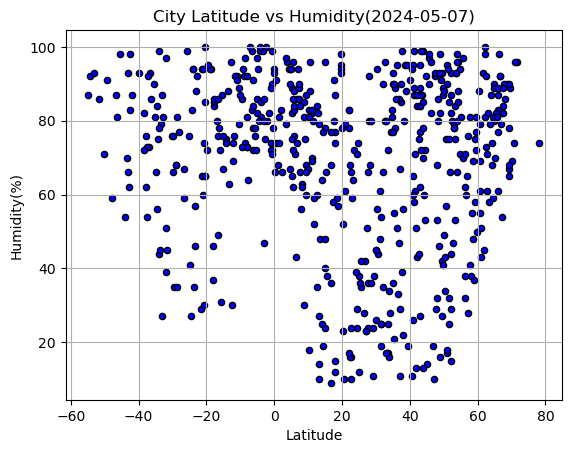

In [13]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat",y="Humidity",title="City Latitude vs Humidity(2024-05-07)", color="Blue", 
                  xlabel="Latitude", ylabel= "Humidity(%)", grid= True,edgecolors="black")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Observation: No exact relationship can be inferred between latitude and Humidity from the plot.

#### Latitude Vs. Cloudiness

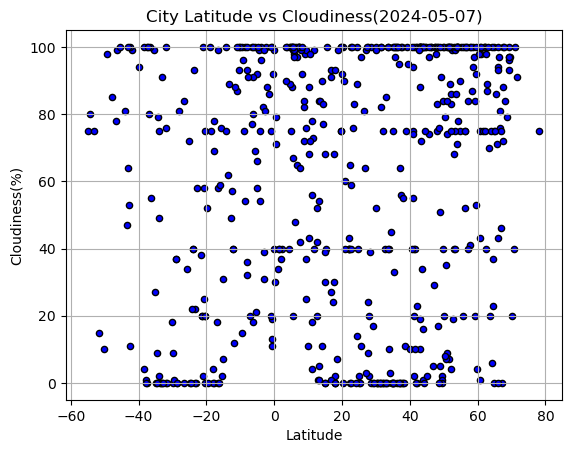

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat",y="Cloudiness",title="City Latitude vs Cloudiness(2024-05-07)", color="Blue", 
                  xlabel="Latitude", ylabel= "Cloudiness(%)", grid= True,edgecolors="black")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Observation: No significant relationship between the two variables (latitude and Cloudiness)

#### Latitude vs. Wind Speed Plot

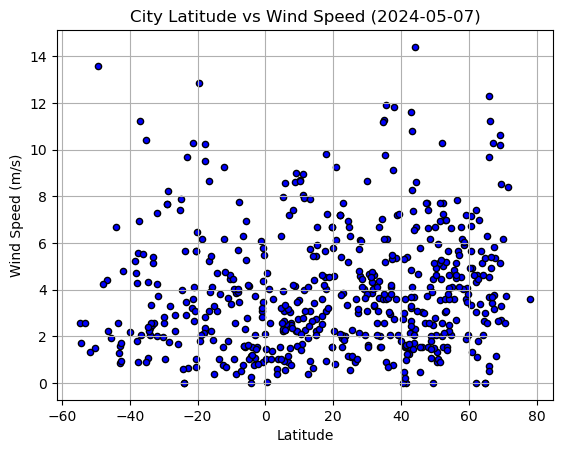

In [15]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
city_data_df.plot(kind="scatter", x="Lat",y="Wind Speed",title="City Latitude vs Wind Speed (2024-05-07)", color="Blue", 
                  xlabel="Latitude", ylabel= "Wind Speed (m/s)", grid= True,edgecolors="black")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

Observation: Wind Speed and Latitude are not related to each other. Most cities in both the hemisphere have wind speed less than 8 m/s.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def linearregression (Latitude, parameter):
    x_value = Latitude
    y_value = parameter
    
    # Calculate linear regression parameters
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value,y_value)
    print(f"The r-value is: {rvalue}")
    regress_values =x_value * slope + intercept
    
    # Create a string representation of the linear regression equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    #Build scatter plot
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_values, "r-")
    plt.annotate(line_eq, (x_value.min() + 20, y_value.min() + 10), fontsize=15, color="red") 

    # Incorporate the other graph properties
    plt.xlabel("Latitude")
    plt.tight_layout()
  



In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,kandyagash,49.4744,57.4233,15.47,42,2,2.47,KZ,1715060692
5,berezovyy,51.6667,135.7000,13.96,32,7,3.55,RU,1715060694
7,qaqortoq,60.7167,-46.0333,-1.66,55,1,3.33,GL,1715060695
10,tiksi,71.6872,128.8694,-0.55,96,91,8.40,RU,1715060697
11,broome,42.2506,-75.8330,8.82,84,100,1.24,US,1715060698


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<=0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,luderitz,-26.6481,15.1594,15.13,67,0,2.93,NaN,1715060690
1,port-aux-francais,-49.3500,70.2167,7.37,91,98,13.59,TF,1715060691
2,konde,-4.9500,39.7500,27.11,86,92,4.17,TZ,1715060692
4,fonte boa,-2.4959,-66.2662,23.36,100,100,1.54,BR,1715060693
6,east london,-33.0153,27.9116,26.52,27,0,5.14,ZA,1715060694


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8546783540715478


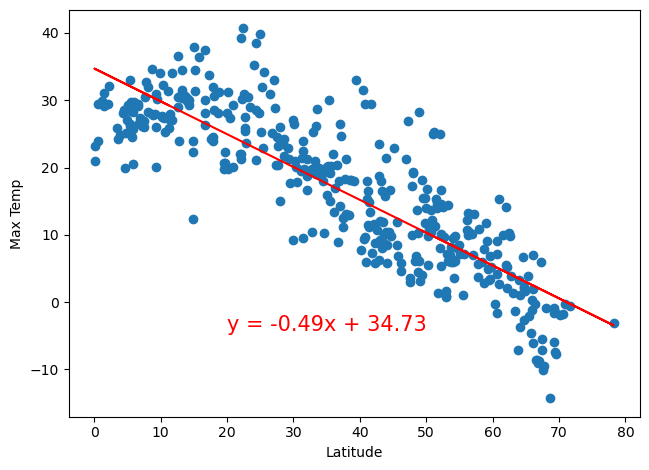

In [26]:
# Linear regression on Northern Hemisphere
lat_north=northern_hemi_df["Lat"]
temperature = northern_hemi_df["Max Temp"]
linearregression(lat, temperature)
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.8169698543458973


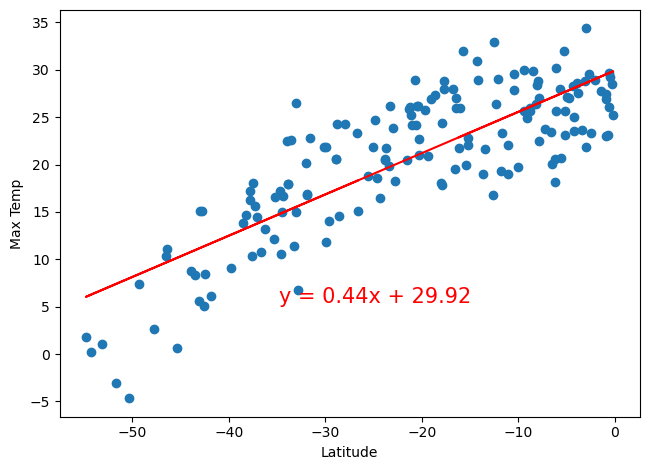

In [27]:
# Linear regression on Southern Hemisphere
lat_south=southern_hemi_df["Lat"]
temperature = southern_hemi_df["Max Temp"]
linearregression(lat_south, temperature)
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** 
In the northern hemisphere higher temperature is observed in the cities around 25 latitude. the temperature decreases as we move further up to higher latitudes.
In the souther hemisphere the temperature is higher in cities near equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.10454255834149967


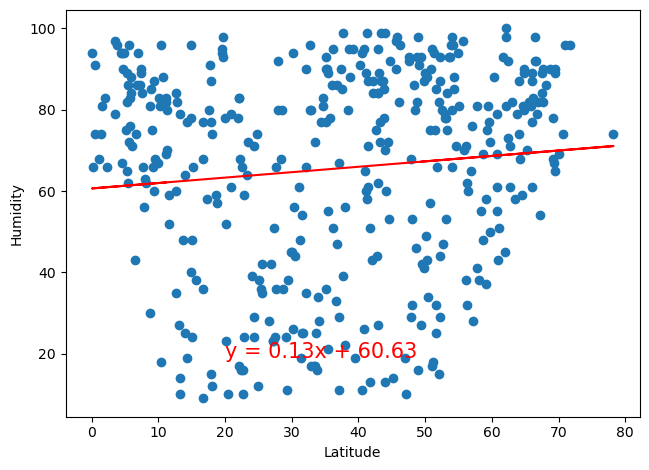

In [28]:
# Northern Hemisphere
humidity = northern_hemi_df["Humidity"]
linearregression(lat_north,humidity)
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.1370015358304245


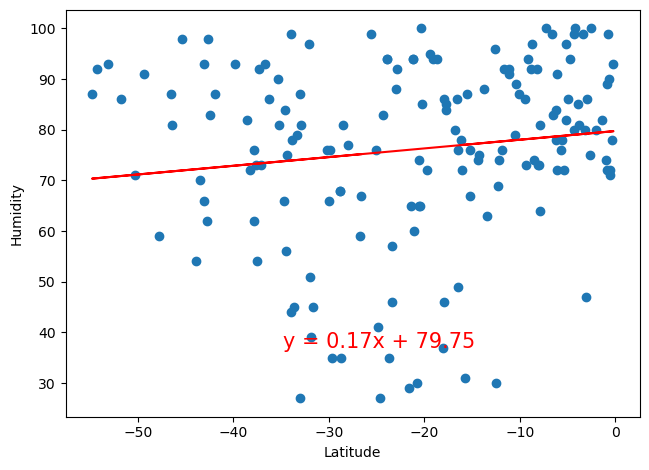

In [29]:
# Southern Hemisphere
humidity = southern_hemi_df["Humidity"]
linearregression(lat_south,humidity)
plt.ylabel("Humidity")
plt.show()

Discussion about the linear relationship: No specific relationship between humidity and latitude in both the hemispheres. Northern hemisphere is more humid .

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12091202647126485


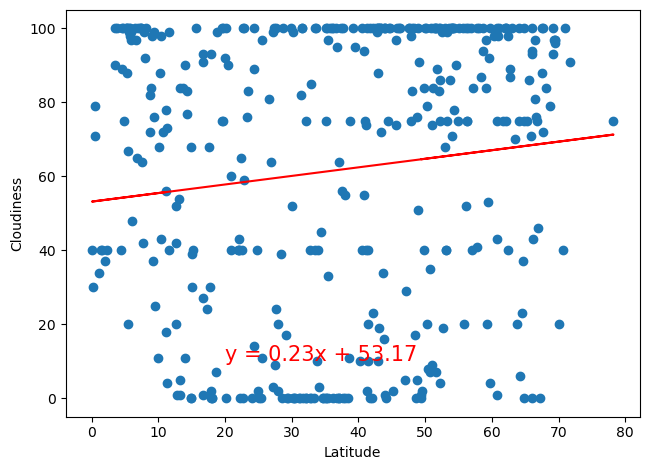

In [30]:
# Northern Hemisphere
cloudiness = northern_hemi_df["Cloudiness"]
linearregression(lat_north,cloudiness)
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.15958344471076719


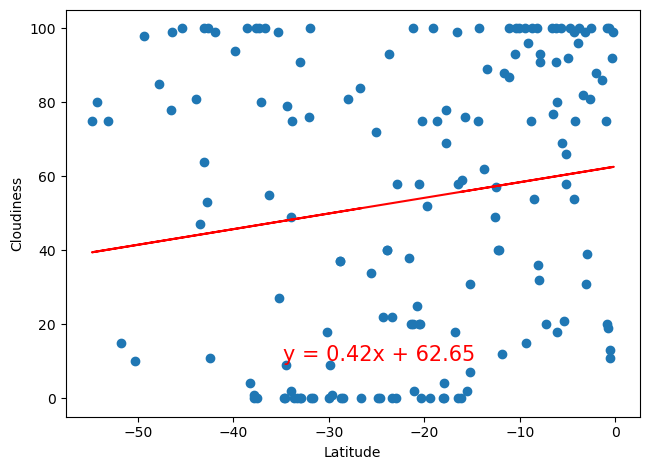

In [31]:
# Southern Hemisphere
cloudiness = southern_hemi_df["Cloudiness"]
linearregression(lat_south,cloudiness)
plt.ylabel("Cloudiness")
plt.show()

Cities in northern hemisphere are more cloudy than southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.14290184393218483


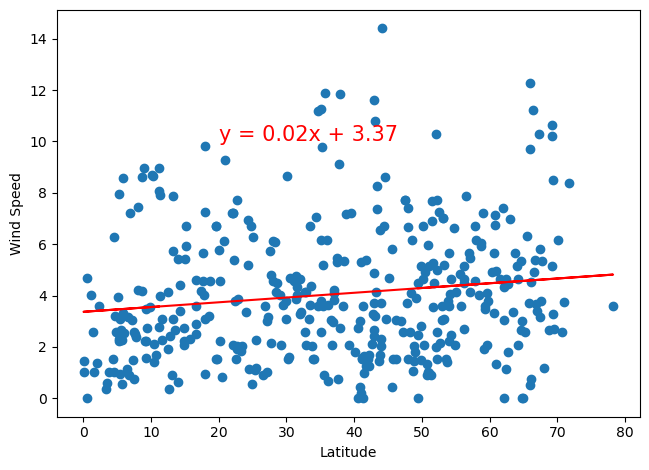

In [32]:
# Northern Hemisphere
windspeed = northern_hemi_df["Wind Speed"]
linearregression(lat_north,windspeed)
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.08473530983363266


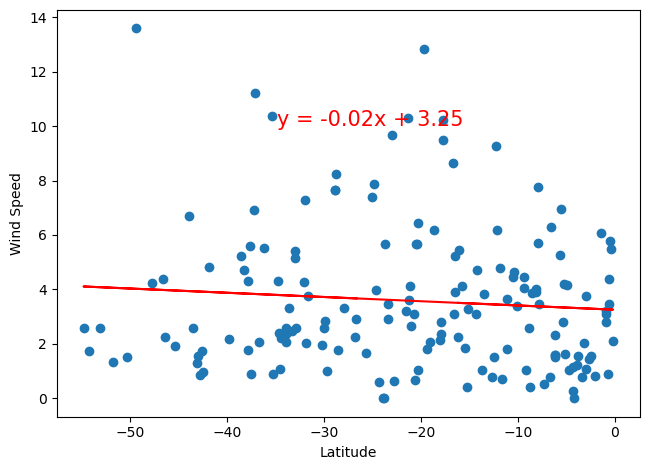

In [33]:
# Southern Hemisphere
windspeed = southern_hemi_df["Wind Speed"]
linearregression(lat_south,windspeed)
plt.ylabel("Wind Speed")
plt.show()

the wind speed slows down near equator for both the hemisphere.